# Analysing Attacker 

This notebook contains the code required to conduct a Bayesian data analysis on data collected

## First attacker

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [age]
Sampling 2 chains: 100%|██████████| 30000/30000 [00:08<00:00, 3452.58draws/s]
The number of effective samples is smaller than 25% for some parameters.


found Tom


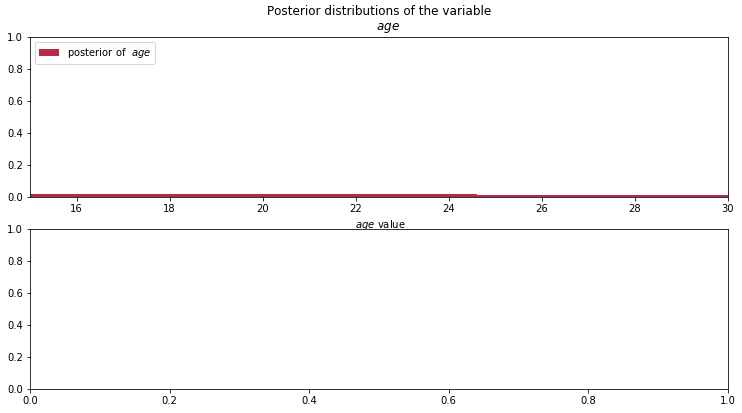

In [4]:
%matplotlib inline

import pymc3 as pm
from IPython.core.pylabtools import figsize
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt


def alpha(nameAgeList):
    ageMap = map(lambda args: (args[1], 1), nameAgeList)
    addedAgeTuple = reduce(lambda x, y: (x[0] + y[0], x[1] + y[1]),
                           ageMap)  # In Python 2, the map() built-in function returns an iterator https://thepythonguru.com/python-builtin-functions/map/
    # In Python 2, the map()  function returns a list instead of an iterator (which is not very efficient in terms of memory consumption), so we don’t need to wrap map()  in a list()  call.
    averageAge = addedAgeTuple[0] / addedAgeTuple[1]
    return averageAge

# the attacker knows that Tom is in the list

with pm.Model() as attackerModel:
    # Priors for age model parameters
    nameAgeList = [("Tom", 10)]#what the attacker has learned and Tom's age in the prior
    #an array of 100 random vaiables with random names and ages and for one of them I want to observe
    age = pm.Normal('age', mu=alpha(nameAgeList), sd=20)

    # the attacker knows that Tom is in the list
    for each in nameAgeList:
        if "Tom"in each:
            print("found Tom")
            found_Tom=pm.Bernoulli("found_Tom",1.0, observed=True)
            #pm.Deterministic variable if TOm is in the list and observed it
            #remove the variable altogether; compute deterministiclly of the array of ages and make an observation of the average age
            pass
        else:
            found_Tom = pm.Bernoulli("found_Tom", 0.0, observed=True)
            # pm.Deterministic variable if TOm is in the list
            print("Tom not found")

        # Expected value of outcome

        # Likelihood (sampling distribution) of observations
        step = pm.Metropolis()
        trace = pm.sample(10000, tune=5000, step=step)
        age_samples = trace['age']

    figsize(12.5, 10)
    # histogram of the samples:

    ax = plt.subplot(311)
    ax.set_autoscaley_on(False)

    plt.hist(age_samples, histtype='stepfilled', bins=30, alpha=0.85,
                     label="posterior of $\ age$", color="#A60628", density=True)
    plt.legend(loc="upper left")
    plt.title(r"""Posterior distributions of the variable
    $\ age$""")
    plt.xlim([15, 30])
    plt.xlabel("$\ age$ value")

    ax = plt.subplot(312)
    ax.set_autoscaley_on(False)
    plt.show()